In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level_95 = 0.95
confidence_level_90 = 0.90
error_margin = 0.05  # 误差范围

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

z_95 = get_z_value(confidence_level_95)
z_90 = get_z_value(confidence_level_90)

# 样本量计算函数
def calculate_sample_size(confidence_level, p0, error_margin):
    z = get_z_value(confidence_level)
    n = (z**2 * p0 * (1 - p0)) / (error_margin**2)
    return np.ceil(n).astype(int)

# 计算所需样本量
sample_size_95 = calculate_sample_size(confidence_level_95, p0, error_margin)
sample_size_90 = calculate_sample_size(confidence_level_90, p0, error_margin)

print(f"在95%信度下，所需样本量: {sample_size_95}")
print(f"在90%信度下，所需样本量: {sample_size_90}")

# 确定拒绝域
def calculate_rejection_threshold(sample_size, p0, confidence_level):
    z = get_z_value(confidence_level)
    threshold = p0 + (z * np.sqrt(p0 * (1 - p0) / sample_size))
    return threshold

threshold_95 = calculate_rejection_threshold(sample_size_95, p0, confidence_level_95)
threshold_90 = calculate_rejection_threshold(sample_size_90, p0, confidence_level_90)

print(f"在95%信度下，次品率超出阈值的比例: {threshold_95:.2f}")
print(f"在90%信度下，次品率超出阈值的比例: {threshold_90:.2f}")

# 计算接收或拒绝批次的函数
def accept_or_reject_sample(observed_defective_rate, threshold):
    return observed_defective_rate <= threshold

# 示例: 根据实际抽样结果进行判断
observed_defective_rate = 0.12  # 假设检测到的次品率为12%
decision_95 = accept_or_reject_sample(observed_defective_rate, threshold_95)
decision_90 = accept_or_reject_sample(observed_defective_rate, threshold_90)

print(f"在95%信度下，根据次品率{observed_defective_rate:.2f}，是否接收批次: {'接受' if decision_95 else '拒收'}")
print(f"在90%信度下，根据次品率{observed_defective_rate:.2f}，是否接收批次: {'接受' if decision_90 else '拒收'}")

# 绘制饼图
def plot_pie_chart(defective_rate, threshold, confidence_level, ax):
    labels = ['次品率', '正品率']
    sizes = [defective_rate, 1 - defective_rate]
    colors = ['#ff9999','#66b3ff']
    
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{confidence_level*100}% 信度下的次品率和正品率')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_pie_chart(observed_defective_rate, threshold_95, confidence_level_95, axs[0])
plot_pie_chart(observed_defective_rate, threshold_90, confidence_level_90, axs[1])

axs[0].set_title(f'95% 信度下的次品率和正品率')
axs[1].set_title(f'90% 信度下的次品率和正品率')

plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.06  # 误差范围

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

z = get_z_value(confidence_level)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z):
    n = (z**2 * p0 * (1 - p0)) / (error_margin**2)
    return np.ceil(n).astype(int)

# 计算所需样本量
sample_size = calculate_sample_size(p0, error_margin, z)
print(f"在{confidence_level*100}%信度下，所需样本量: {sample_size}")

# 生成正品和次品样本数据
def generate_sample_data(sample_size, p0):
    # 生成二项分布数据，1表示次品，0表示正品
    data = np.random.binomial(1, p0, sample_size)
    return data

# 生成数据
data = generate_sample_data(sample_size, p0)

# 计算样本中的次品率
sample_defective_rate = np.mean(data)
print(f"样本中的次品率: {sample_defective_rate:.2f}")

# 计算95%置信区间
def calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level):
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / sample_size)
    margin_of_error = get_z_value(confidence_level) * std_dev
    lower_bound = sample_defective_rate - margin_of_error
    upper_bound = sample_defective_rate + margin_of_error
    return lower_bound, upper_bound

# 计算置信区间
lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level)

print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")

# 判断是否拒收批次：基于样本次品率直接判断
def accept_or_reject_batch(sample_defective_rate, p0):
    # 如果样本次品率小于等于标称次品率p0，则接受，否则拒收
    if sample_defective_rate <= p0:
        return "接受"
    else:
        return "拒收"

# 判断是否拒收
decision = accept_or_reject_batch(sample_defective_rate, p0)
print(f"根据样本次品率判断，是否拒收批次: {decision}")

# 绘制正态分布图和饼图
def plot_results(data, lower_bound, upper_bound, sample_defective_rate):
    plt.figure(figsize=(12, 6))
    
    # 正态分布图
    plt.subplot(1, 2, 1)
    mu = sample_defective_rate
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / len(data))
    x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()
    
    # 饼图
    plt.subplot(1, 2, 2)
    non_defective_rate = 1 - sample_defective_rate
    labels = ['次品率', '正品率']
    sizes = [sample_defective_rate, non_defective_rate]
    colors = ['#ff9999', '#66b3ff']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')
    
    plt.tight_layout()
    plt.show()

# 绘制结果图
plot_results(data, lower_bound, upper_bound, sample_defective_rate)

# 动态调整误差范围
new_error_margin = 0.05  # 假设将误差范围调整为5%
new_sample_size = calculate_sample_size(p0, new_error_margin, z)
print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.90  # 置信度设置为90%
error_margin = 0.05  # 误差范围

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

z = get_z_value(confidence_level)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z):
    n = (z**2 * p0 * (1 - p0)) / (error_margin**2)
    return np.ceil(n).astype(int)

# 计算所需样本量
sample_size = calculate_sample_size(p0, error_margin, z)
print(f"在{confidence_level*100}%信度下，所需样本量: {sample_size}")

# 生成正品和次品样本数据
def generate_sample_data(sample_size, p0):
    # 生成二项分布数据，1表示次品，0表示正品
    data = np.random.binomial(1, p0, sample_size)
    return data

# 生成数据
data = generate_sample_data(sample_size, p0)

# 计算样本中的次品率
sample_defective_rate = np.mean(data)
print(f"样本中的次品率: {sample_defective_rate:.2f}")

# 计算置信区间
def calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level):
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / sample_size)
    margin_of_error = get_z_value(confidence_level) * std_dev
    lower_bound = sample_defective_rate - margin_of_error
    upper_bound = sample_defective_rate + margin_of_error
    return lower_bound, upper_bound

# 计算置信区间
lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level)

print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")

# 判断是否拒收批次：基于样本次品率直接判断
def accept_or_reject_batch(sample_defective_rate, p0):
    # 如果样本次品率小于等于标称次品率p0，则接受，否则拒收
    if sample_defective_rate <= p0:
        return "接受"
    else:
        return "拒收"

# 判断是否拒收
decision = accept_or_reject_batch(sample_defective_rate, p0)
print(f"根据样本次品率判断，是否拒收批次: {decision}")

# 绘制正态分布图和饼图
def plot_results(data, lower_bound, upper_bound, sample_defective_rate):
    plt.figure(figsize=(12, 6))
    
    # 正态分布图
    plt.subplot(1, 2, 1)
    mu = sample_defective_rate
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / len(data))
    x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()
    
    # 饼图
    plt.subplot(1, 2, 2)
    non_defective_rate = 1 - sample_defective_rate
    labels = ['次品率', '正品率']
    sizes = [sample_defective_rate, non_defective_rate]
    colors = ['#ff9999', '#66b3ff']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')
    
    plt.tight_layout()
    plt.show()

# 绘制结果图
plot_results(data, lower_bound, upper_bound, sample_defective_rate)

# 动态调整误差范围
new_error_margin = 0.05  # 假设将误差范围调整为5%
new_sample_size = calculate_sample_size(p0, new_error_margin, z)
print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")


In [ ]:
import numpy as np
from scipy.stats import norm

# 参数设置
sample_size = 100  # 假设的样本量
sample_defective_rate = 0.1  # 假设的样本次品率

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

# 计算误差范围
def calculate_margin_of_error(sample_defective_rate, sample_size, confidence_level):
    z = get_z_value(confidence_level)
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / sample_size)
    margin_of_error = z * std_dev
    return margin_of_error

# 计算90%和95%置信度下的误差范围
margin_of_error_90 = calculate_margin_of_error(sample_defective_rate, sample_size, 0.90)
margin_of_error_95 = calculate_margin_of_error(sample_defective_rate, sample_size, 0.95)

print(f"在90%置信度下的误差范围: {margin_of_error_90:.2f}")
print(f"在95%置信度下的误差范围: {margin_of_error_95:.2f}")


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.05  # 误差范围
initial_sample_size = 10  # 初始样本量

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

z = get_z_value(confidence_level)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z):
    n = (z**2 * p0 * (1 - p0)) / (error_margin**2)
    return np.ceil(n).astype(int)

# 计算所需样本量
sample_size = calculate_sample_size(p0, error_margin, z)
print(f"在{confidence_level*100}%信度下，所需抽样检验的样本量: {sample_size}")
print(f"初始提供的样本量为: {initial_sample_size}")

# 生成正品和次品样本数据
def generate_sample_data(sample_size, p0):
    # 生成二项分布数据，1表示次品，0表示正品
    data = np.random.binomial(1, p0, sample_size)
    return data

# 使用初始样本量生成数据
data = generate_sample_data(initial_sample_size, p0)

# 计算样本中的次品率
sample_defective_rate = np.mean(data)
print(f"初始样本中的次品率: {sample_defective_rate:.2f}")

# 计算95%置信区间
def calculate_confidence_interval(sample_defective_rate, sample_size, confidence_level):
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / sample_size)
    margin_of_error = get_z_value(confidence_level) * std_dev
    lower_bound = sample_defective_rate - margin_of_error
    upper_bound = sample_defective_rate + margin_of_error
    return lower_bound, upper_bound

# 计算置信区间
lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, initial_sample_size, confidence_level)
print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")

# 判断是否拒收批次：基于样本次品率直接判断
def accept_or_reject_batch(sample_defective_rate, p0):
    # 如果样本次品率小于等于标称次品率p0，则接受，否则拒收
    if sample_defective_rate <= p0:
        return "接受"
    else:
        return "拒收"

# 判断是否拒收
decision = accept_or_reject_batch(sample_defective_rate, p0)
print(f"根据样本次品率判断，是否拒收批次: {decision}")

# 绘制正态分布图和饼图
def plot_results(data, lower_bound, upper_bound, sample_defective_rate):
    plt.figure(figsize=(12, 6))
    
    # 正态分布图
    plt.subplot(1, 2, 1)
    mu = sample_defective_rate
    std_dev = np.sqrt(sample_defective_rate * (1 - sample_defective_rate) / len(data))
    x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()
    
    # 饼图
    plt.subplot(1, 2, 2)
    non_defective_rate = 1 - sample_defective_rate
    labels = ['次品率', '正品率']
    sizes = [sample_defective_rate, non_defective_rate]
    colors = ['#ff9999', '#66b3ff']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')
    
    plt.tight_layout()
    plt.show()

# 绘制结果图
plot_results(data, lower_bound, upper_bound, sample_defective_rate)

# 动态调整误差范围
new_error_margin = 0.03  # 将误差范围调整为3%
new_sample_size = calculate_sample_size(p0, new_error_margin, z)
print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")


In [ ]:
import numpy as np
from scipy.stats import norm

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.05  # 误差范围
initial_sample_size = 10  # 初始样本量

# 计算 z_{\alpha/2}
z_alpha_2 = norm.ppf(1 - (1 - confidence_level) / 2)

# 计算总体标准差
sigma = np.sqrt(p0 * (1 - p0))

# 计算所需样本量
n = ((z_alpha_2 * sigma) / error_margin) ** 2

print(f"所需样本量: {n:.2f}")

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.05  # 误差范围
initial_sample_size = 10  # 初始样本量

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z_value):
    return np.ceil((z_value**2 * p0 * (1 - p0)) / (error_margin**2)).astype(int)

# 生成样本数据（次品率为p0）
def generate_sample_data(sample_size, p0):
    return np.random.binomial(1, p0, sample_size)

# 计算样本中的次品率
def calculate_defective_rate(data):
    return np.mean(data)

# 计算置信区间
def calculate_confidence_interval(defective_rate, sample_size, z_value):
    std_dev = np.sqrt(defective_rate * (1 - defective_rate) / sample_size)
    margin_of_error = z_value * std_dev
    return defective_rate - margin_of_error, defective_rate + margin_of_error

# 判断是否拒收批次
def accept_or_reject_batch(defective_rate, p0):
    return "接受" if defective_rate <= p0 else "拒收"

# 绘制正态分布和饼图
def plot_results(defective_rate, lower_bound, upper_bound, data_size):
    plt.figure(figsize=(12, 6))

    # 正态分布图
    plt.subplot(1, 2, 1)
    std_dev = np.sqrt(defective_rate * (1 - defective_rate) / data_size)
    x = np.linspace(defective_rate - 3*std_dev, defective_rate + 3*std_dev, 100)
    p = norm.pdf(x, defective_rate, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()

    # 饼图
    plt.subplot(1, 2, 2)
    labels = ['次品率', '正品率']
    sizes = [defective_rate, 1 - defective_rate]
    colors = ['#ff9999', '#66b3ff']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')

    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    # 计算z值
    z_value = get_z_value(confidence_level)
    
    # 计算所需样本量
    sample_size = calculate_sample_size(p0, error_margin, z_value)
    print(f"在{confidence_level*100}%信度下，所需抽样检验的样本量: {sample_size}")
    print(f"初始提供的样本量为: {initial_sample_size}")
    
    # 生成样本数据
    data = generate_sample_data(initial_sample_size, p0)
    
    # 计算初始样本的次品率
    sample_defective_rate = calculate_defective_rate(data)
    print(f"初始样本中的次品率: {sample_defective_rate:.2f}")
    
    # 计算置信区间
    lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, initial_sample_size, z_value)
    print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")
    
    # 判断是否拒收批次
    decision = accept_or_reject_batch(sample_defective_rate, p0)
    print(f"根据样本次品率判断，是否拒收批次: {decision}")
    
    # 绘制正态分布和饼图
    plot_results(sample_defective_rate, lower_bound, upper_bound, initial_sample_size)
    
    # 动态调整误差范围并计算新的样本量
    new_error_margin = 0.03
    new_sample_size = calculate_sample_size(p0, new_error_margin, z_value)
    print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")


理论上在95.0%信度下，误差为1.0%时的最小样本量: 3458
样本中的次品率: 0.07
95%置信区间: (-0.02, 0.16)
根据样本次品率判断，是否拒收批次: 接受


C:\Users\huang\AppData\Local\Temp\ipykernel_37424\4147946731.py:63: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()


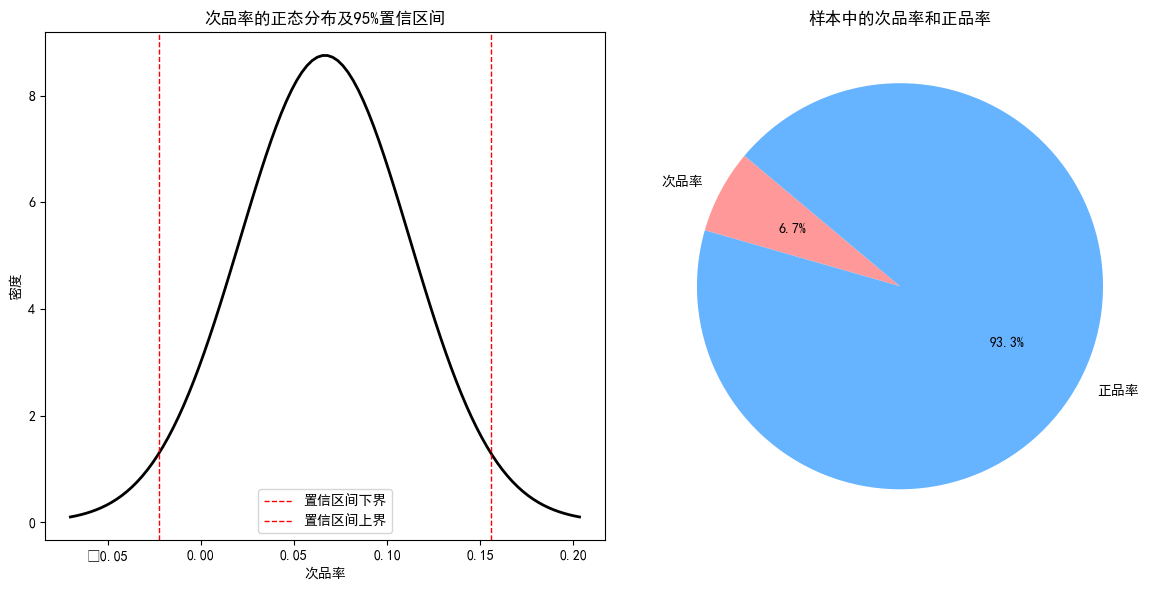

在95.0%信度下，误差为2.0%时的最小样本量: 865


In [456]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 参数设置
p0 = 0.10  # 标称次品率
confidence_level = 0.95
error_margin = 0.05  # 误差范围
total_population_size = 1000  # 总样本量，假设大样本量为1000

# 计算在给定置信度下的Z值
def get_z_value(confidence_level):
    return norm.ppf(1 - (1 - confidence_level) / 2)

# 样本量计算函数
def calculate_sample_size(p0, error_margin, z_value):
    return np.ceil((z_value**2 * p0 * (1 - p0)) / (error_margin**2)).astype(int)

# 生成样本数据（从总样本中抽取一定数量的样本）
def generate_sample_data(total_size, sample_size, p0):
    data = np.random.binomial(1, p0, total_size)
    return np.random.choice(data, sample_size, replace=False)

# 计算样本中的次品率
def calculate_defective_rate(data):
    return np.mean(data)

# 计算置信区间
def calculate_confidence_interval(defective_rate, sample_size, z_value):
    std_dev = np.sqrt(defective_rate * (1 - defective_rate) / sample_size)
    margin_of_error = z_value * std_dev
    return defective_rate - margin_of_error, defective_rate + margin_of_error

# 判断是否拒收批次
def accept_or_reject_batch(defective_rate, p0):
    return "接受" if defective_rate <= p0 else "拒收"

# 绘制正态分布和饼图
def plot_results(defective_rate, lower_bound, upper_bound, data_size):
    plt.figure(figsize=(12, 6))

    # 正态分布图
    plt.subplot(1, 2, 1)
    std_dev = np.sqrt(defective_rate * (1 - defective_rate) / data_size)
    x = np.linspace(defective_rate - 3*std_dev, defective_rate + 3*std_dev, 100)
    p = norm.pdf(x, defective_rate, std_dev)
    plt.plot(x, p, 'k', linewidth=2)
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间下界')
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1, label='置信区间上界')
    plt.title('次品率的正态分布及95%置信区间')
    plt.xlabel('次品率')
    plt.ylabel('密度')
    plt.legend()

    # 饼图
    plt.subplot(1, 2, 2)
    labels = ['次品率', '正品率']
    sizes = [defective_rate, 1 - defective_rate]
    colors = ['#ff9999', '#66b3ff']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('样本中的次品率和正品率')

    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    # 从总样本中随机抽取样本量
    sample_size = 30  # 这里设定一个样本量来进行计算，你可以调整这个值
    
    # 计算z值
    z_value = get_z_value(confidence_level)
    
    # 计算所需样本量
    theoretical_sample_size = calculate_sample_size(p0, error_margin, z_value)
    print(f"理论上在{confidence_level*100}%信度下，误差为{error_margin*100}%时的最小样本量: {theoretical_sample_size}")
    
    # 生成样本数据
    data = generate_sample_data(total_population_size, sample_size, p0)
    
    # 计算样本的次品率
    sample_defective_rate = calculate_defective_rate(data)
    print(f"样本中的次品率: {sample_defective_rate:.2f}")
    
    # 计算置信区间
    lower_bound, upper_bound = calculate_confidence_interval(sample_defective_rate, sample_size, z_value)
    print(f"95%置信区间: ({lower_bound:.2f}, {upper_bound:.2f})")
    
    # 判断是否拒收批次
    decision = accept_or_reject_batch(sample_defective_rate, p0)
    print(f"根据样本次品率判断，是否拒收批次: {decision}")
    
    # 绘制正态分布和饼图
    plot_results(sample_defective_rate, lower_bound, upper_bound, sample_size)
    
    # 动态调整误差范围并计算新的样本量
    new_error_margin = 0.02
    new_sample_size = calculate_sample_size(p0, new_error_margin, z_value)
    print(f"在{confidence_level*100}%信度下，误差为{new_error_margin*100}%时的最小样本量: {new_sample_size}")


In [446]:
import math
from scipy.stats import norm

def calculate_sample_size(confidence_level, defect_rate, threshold):
    """
    计算样本大小以满足抽样检测方案的要求
    :param confidence_level: 信度水平，例如0.95表示95%信度
    :param defect_rate: 标称次品率，例如0.1表示10%
    :param threshold: 合格/拒收的阈值
    :return: 计算得到的样本大小
    """
    # 计算显著性水平α
    alpha = 1 - confidence_level
    
    # 计算Z值
    z_value = norm.ppf(1 - alpha / 2)  # 双尾检验
    
    # 计算标准差
    std_dev = math.sqrt(defect_rate * (1 - defect_rate))
    
    # 计算样本大小
    sample_size = (z_value * std_dev / threshold) ** 2
    return math.ceil(sample_size)

# 设定参数
defect_rate = 0.1
threshold = 0.1

# 计算95%信度下的样本大小
confidence_level_95 = 0.95
sample_size_95 = calculate_sample_size(confidence_level_95, defect_rate, threshold)
print(f"95%信度下的样本大小: {sample_size_95}")

# 计算90%信度下的样本大小
confidence_level_90 = 0.90
sample_size_90 = calculate_sample_size(confidence_level_90, defect_rate, threshold)
print(f"90%信度下的样本大小: {sample_size_90}")


95%信度下的样本大小: 35
90%信度下的样本大小: 25
